##Ejercicio 1: Predicción de streams de canciones de Spotify. | Regresión
##Lineal

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import  SimpleImputer


#Predecir el número total de streams acumulados en Spotify:

In [5]:

# Local path to the downloaded CSV file
csv_file_path = "./sample_data/spotify-2023.csv"

# Read the CSV file using the correct path, specifying the encoding
# The 'latin-1' encoding (also known as 'iso-8859-1') is a common encoding for European languages.
# If this doesn't work, try other encodings like 'utf-16', 'cp1252', etc.
data = pd.read_csv(csv_file_path, encoding='latin-1')

# Display the first few rows of the dataset
print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

##Info general

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

##Descripción estadpistica

In [7]:
data.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

##Descripción de categoricas

In [8]:
data.describe(include= ['O']) #object data type only.

track_name artist(s)_name    streams in_deezer_playlists  \
count         953            953        953                 953   
unique        943            645        949                 348   
top      Daylight   Taylor Swift  723894473                   0   
freq            2             34          2                  24   

       in_shazam_charts  key   mode  
count               903  858    953  
unique              198   11      2  
top                   0   C#  Major  
freq                344  120    550

In [9]:
data.ndim

2

In [10]:
data.shape

(953, 24)

In [11]:
data['artist_count']= data['artist_count'].astype(str) #change col datatype()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    object
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [12]:
data['track_name'] = data['track_name'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    object
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

##Comprobación otliers, outstanding data.

##Coeficiente de Pearson; mide la fuerza y dirección de una relación lineal.
##correlación 1 a -1; eliminar siempre una de las variables correlacionadas vuelve menos redundante; evita overfitting.

In [13]:
data.var()

TypeError: could not convert string to float: 'Latto, Jung Kook'

#features no se encuentran en la misma escala,

In [14]:
#Filtrando columnas numéricas:
numerical_data = data.select_dtypes(include=["float64", "int64"])

#calculando varianza; cols numéricas:
variance = numerical_data.var()
variance

released_year           1.235703e+02
released_month          1.271946e+01
released_day            8.467587e+01
in_spotify_playlists    6.237223e+07
in_spotify_charts       3.832194e+02
in_apple_playlists      7.472132e+03
in_apple_charts         2.563421e+03
in_deezer_charts        3.642845e+01
bpm                     7.872402e+02
danceability_%          2.140547e+02
valence_%               5.513401e+02
energy_%                2.739199e+02
acousticness_%          6.757960e+02
instrumentalness_%      7.072473e+01
liveness_%              1.879976e+02
speechiness_%           9.826534e+01
dtype: float64

#Datos categóricos:

In [15]:
cat_cols=data.select_dtypes(include='O').columns # .select_dtypes(include='O') -> seleccionamos columnas categóricas

for c in cat_cols:
  print('\nColumna :',c)
  print(data[c].value_counts()) # .value_counts() -> Número de observaciones por cada categoría.


Columna : track_name
track_name
Daylight                                  2
About Damn Time                           2
SNAP                                      2
Take My Breath                            2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Murder In My Mind                         1
Gangsta's Paradise                        1
CAIRO                                     1
I Love You So                             1
Alone                                     1
Name: count, Length: 943, dtype: int64

Columna : artist(s)_name
artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

Columna : a

##Matriz correlación

<Axes: >

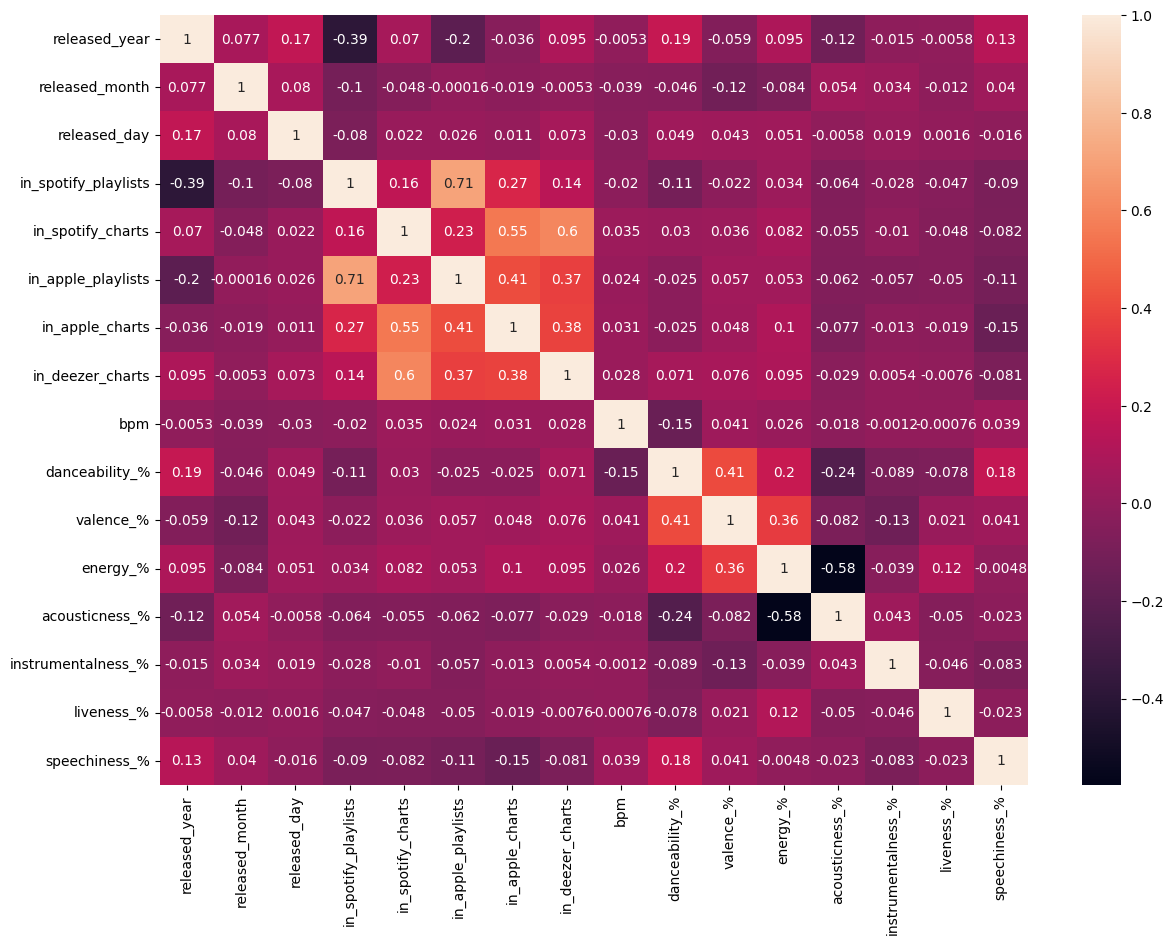

In [16]:
num_cols=data.select_dtypes(include='number').columns # Manera sencilla de escoger columnas numéricas :D

plt.figure(figsize=(14, 10))
matriz=data[num_cols].corr() # Este .corr() nos calcula el coeficiente de PEARSON de todas las variables.

sns.heatmap(matriz,annot=True) # el annot=true es pa que nos muestre las anotaciones (Osease los valores)

#Exploración Visual


Visualizaciones para la columna:  released_year


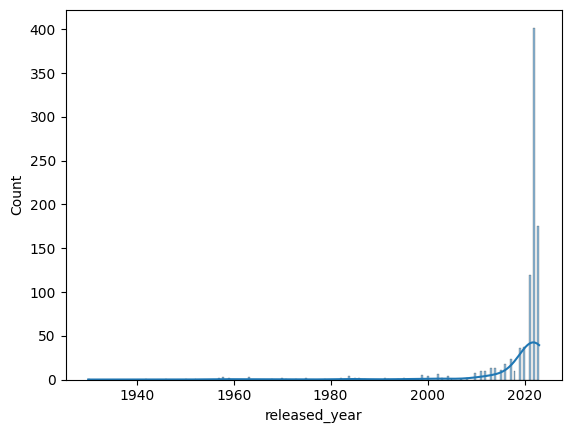

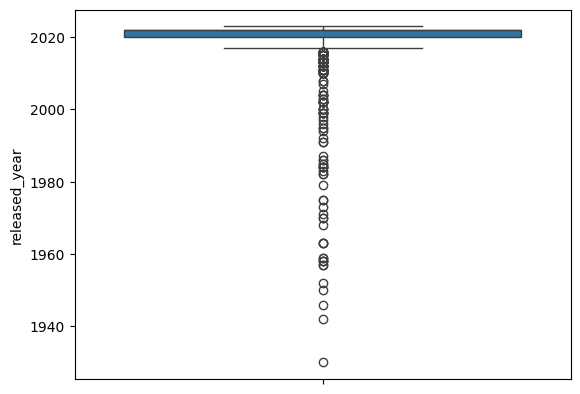


Visualizaciones para la columna:  released_month


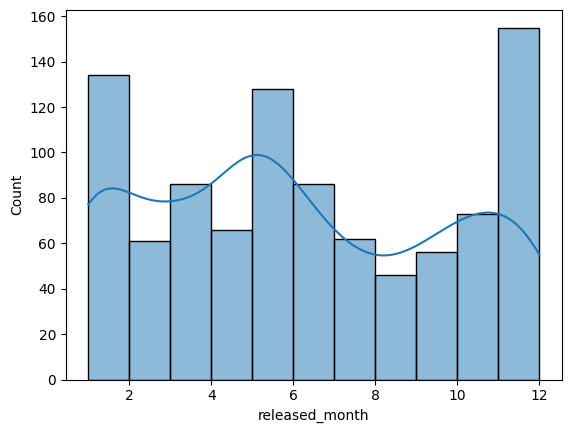

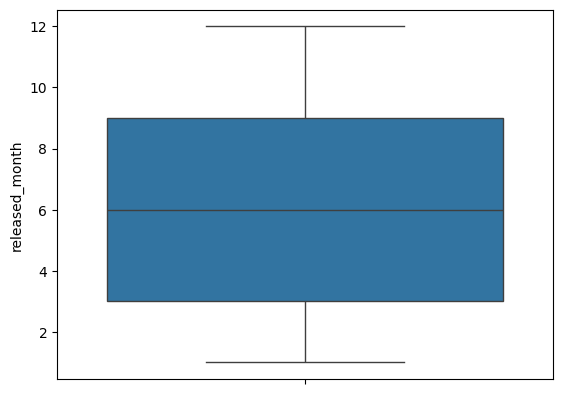


Visualizaciones para la columna:  released_day


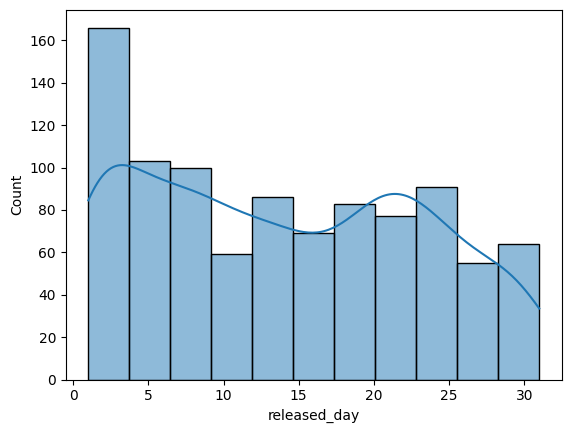

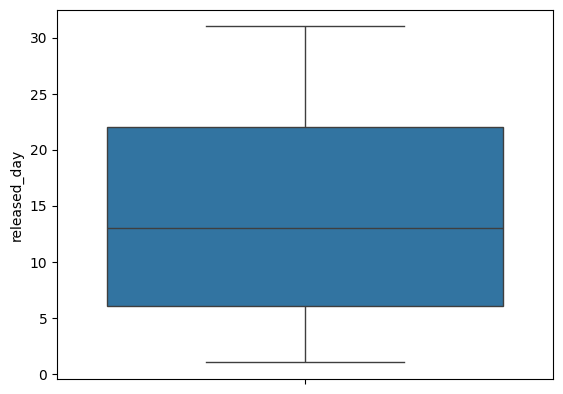


Visualizaciones para la columna:  in_spotify_playlists


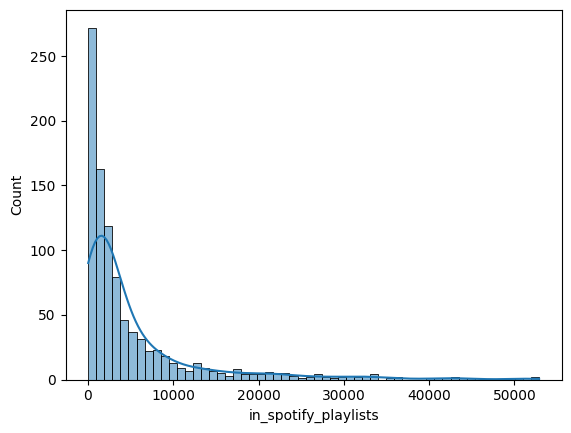

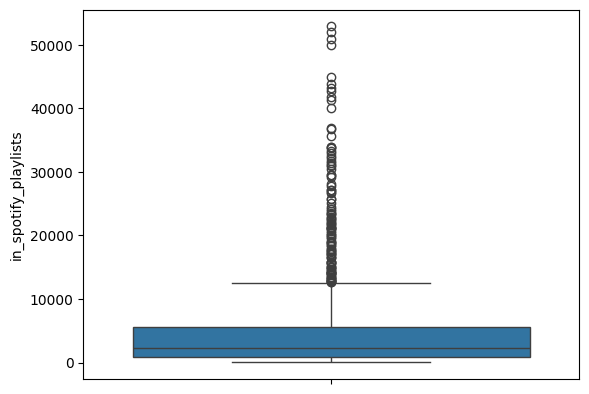


Visualizaciones para la columna:  in_spotify_charts


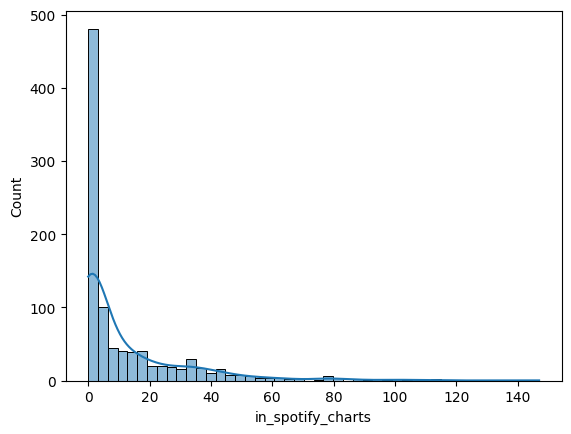

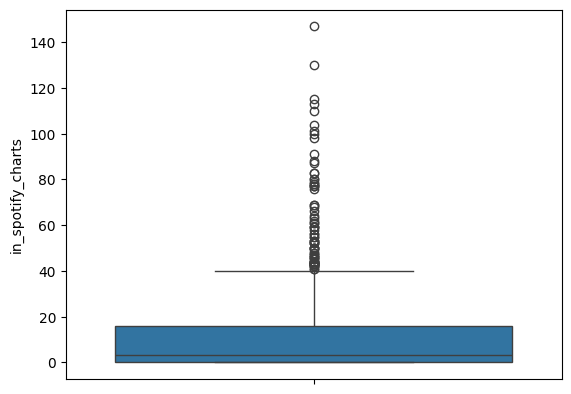


Visualizaciones para la columna:  in_apple_playlists


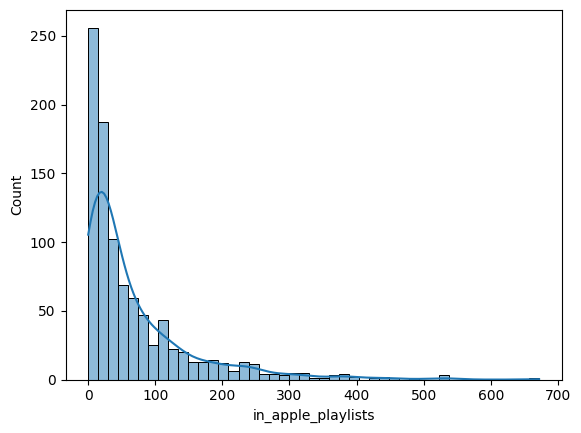

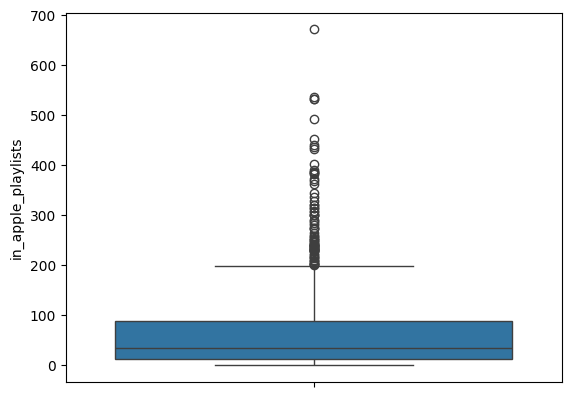


Visualizaciones para la columna:  in_apple_charts


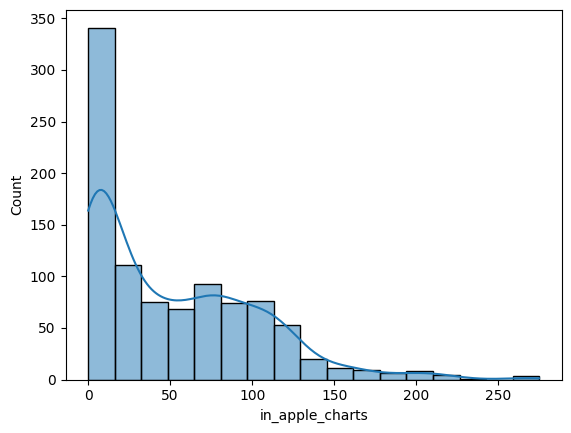

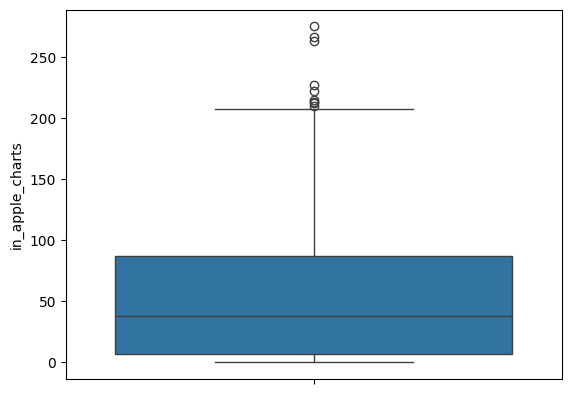


Visualizaciones para la columna:  in_deezer_charts


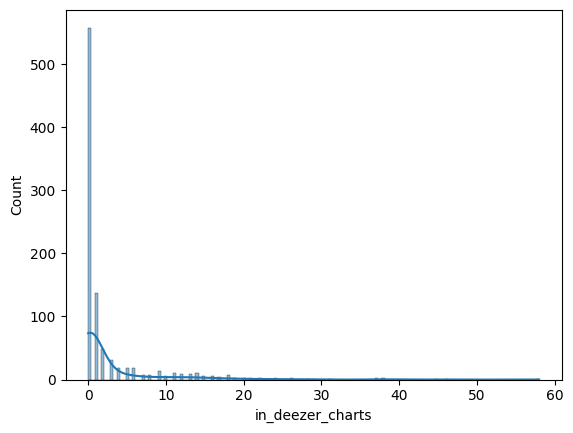

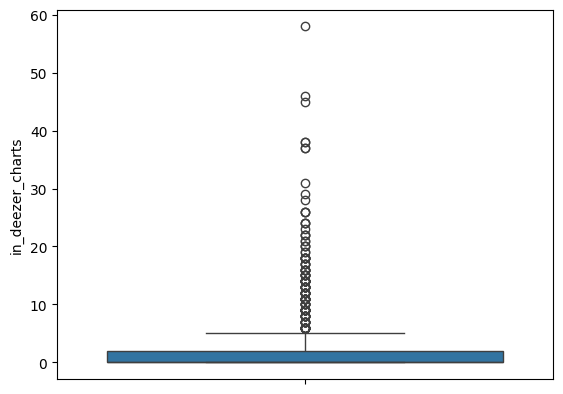


Visualizaciones para la columna:  bpm


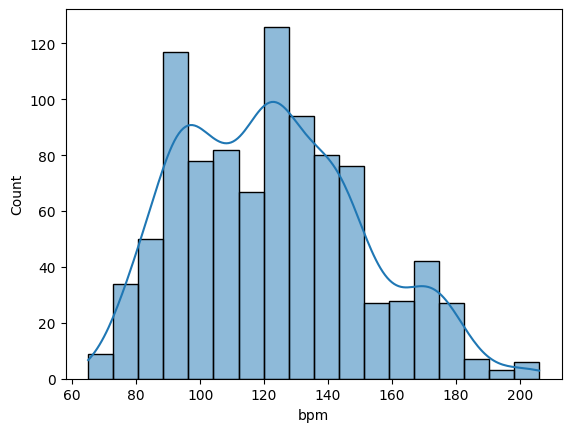

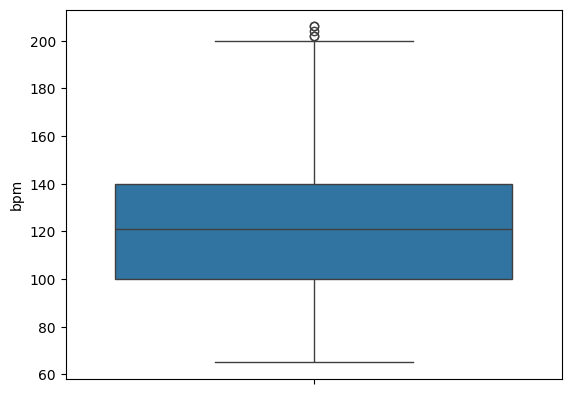


Visualizaciones para la columna:  danceability_%


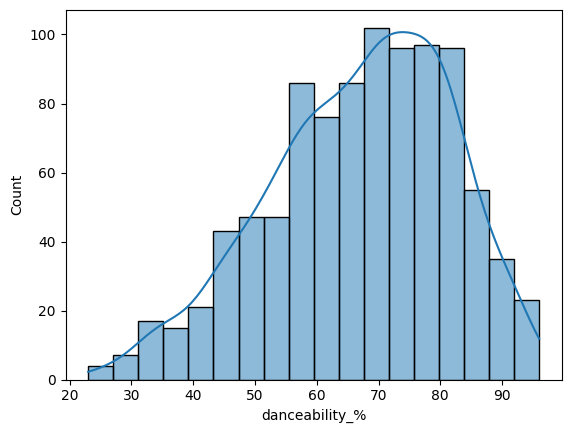

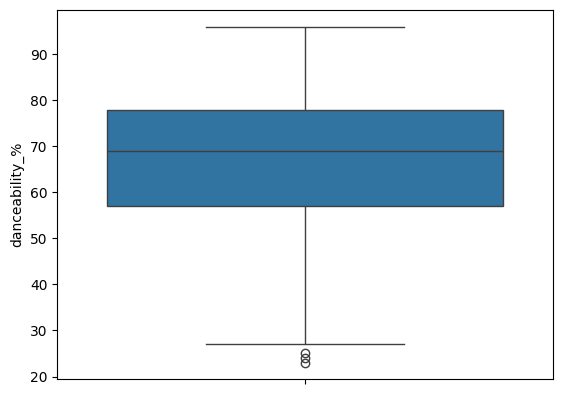


Visualizaciones para la columna:  valence_%


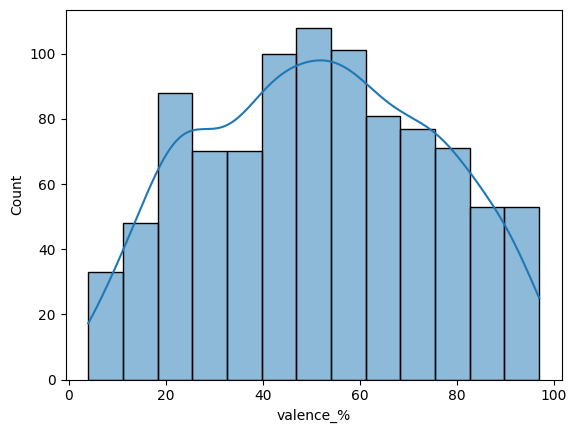

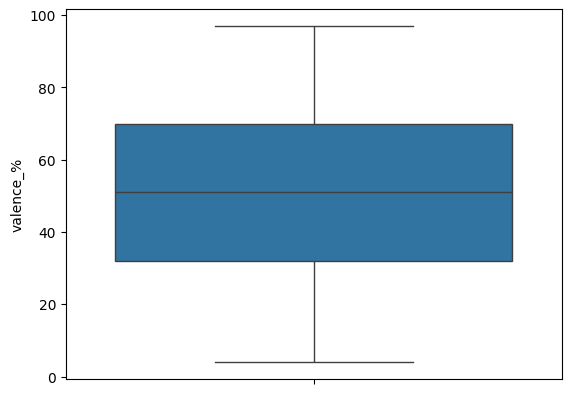


Visualizaciones para la columna:  energy_%


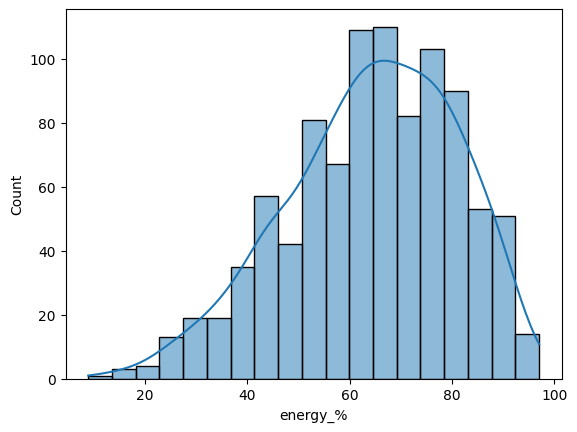

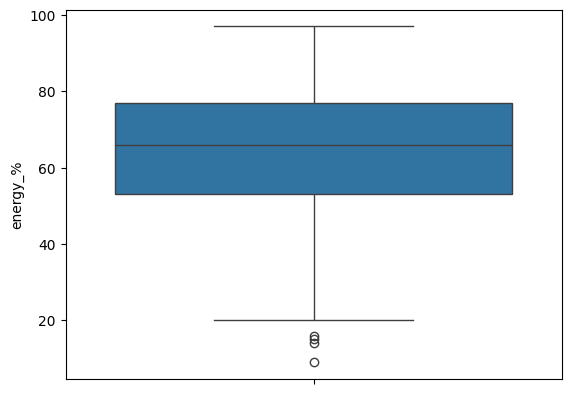


Visualizaciones para la columna:  acousticness_%


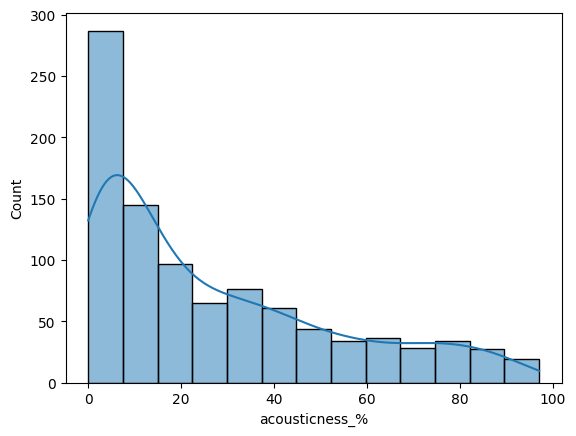

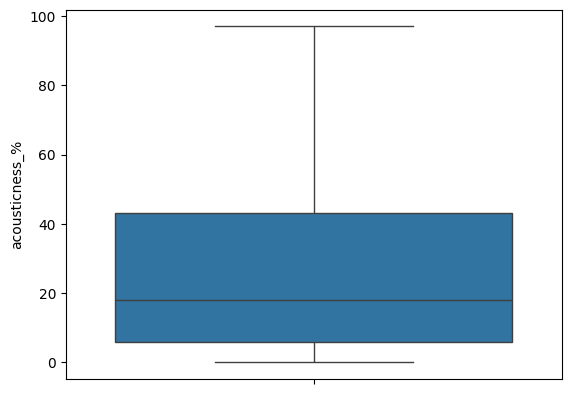


Visualizaciones para la columna:  instrumentalness_%


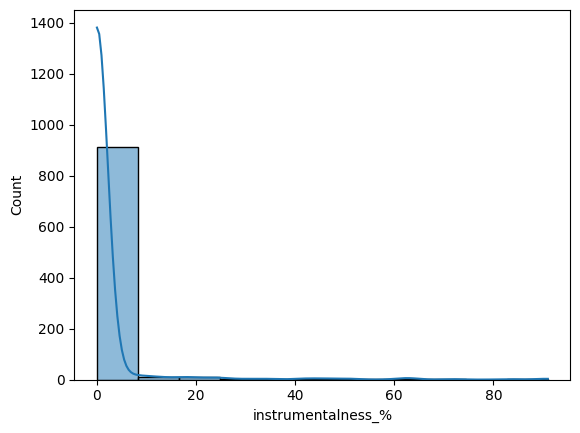

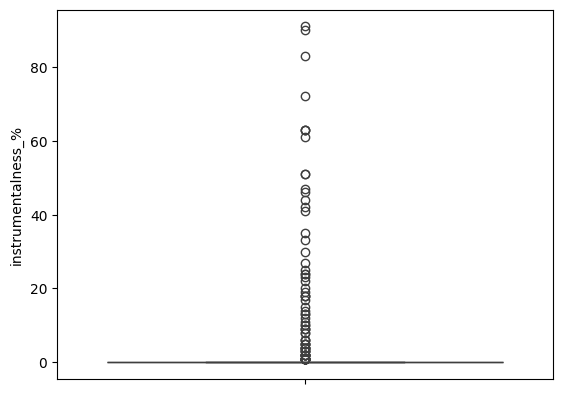


Visualizaciones para la columna:  liveness_%


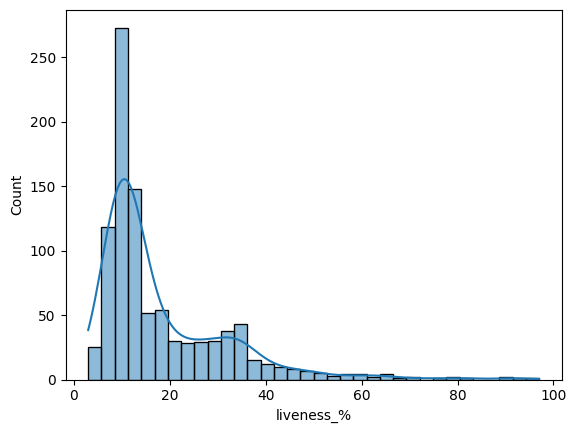

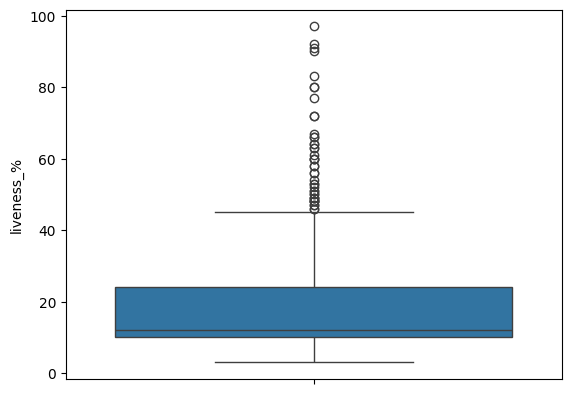


Visualizaciones para la columna:  speechiness_%


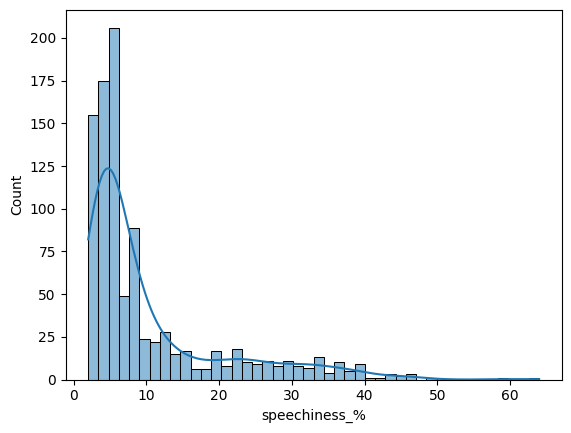

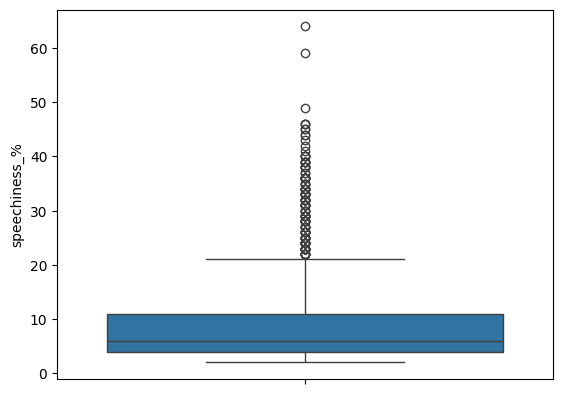

In [17]:
#Columnas numéricas
for col in num_cols:
  print('\nVisualizaciones para la columna: ',col)
  sns.histplot(data[col],kde=True) # Mostrando la distribución de los datos
  plt.show()
  sns.boxplot(data[col]) # para ver si hay outliers, individual that is markedely different from the rest of data.
  plt.show()

##COLS categóricas

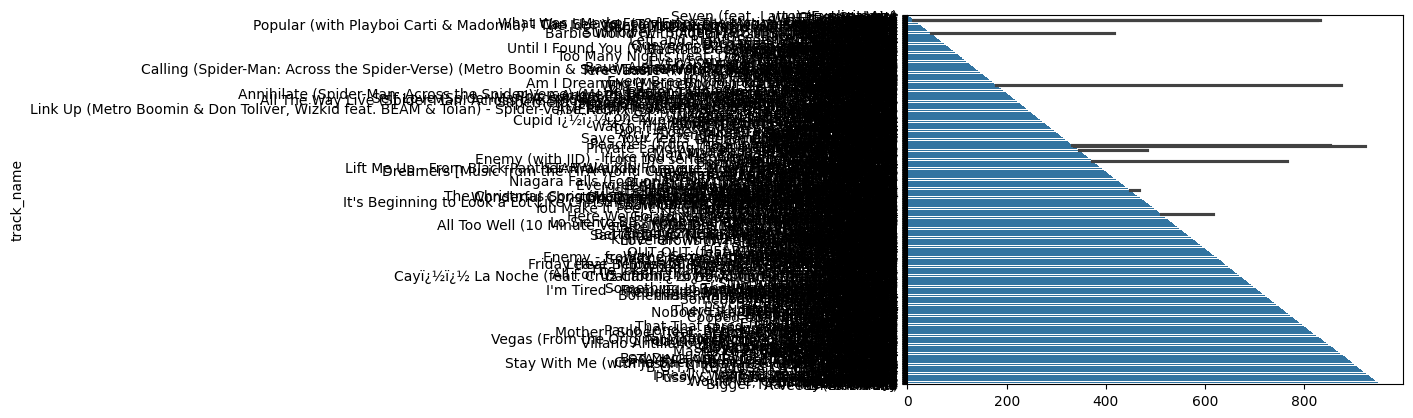

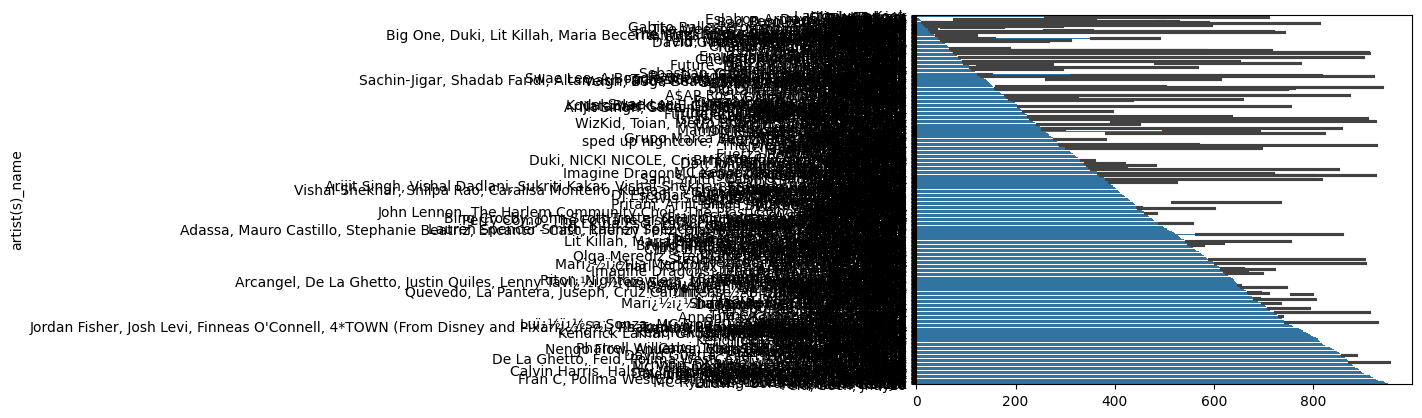

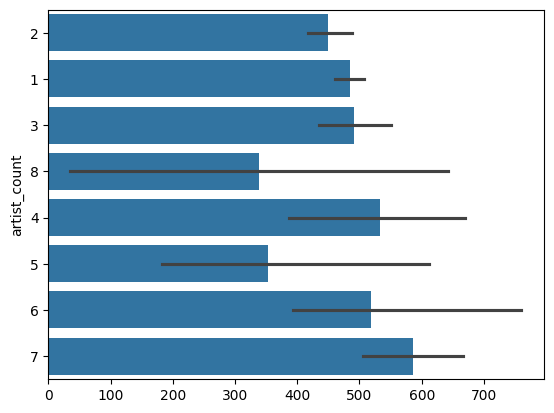

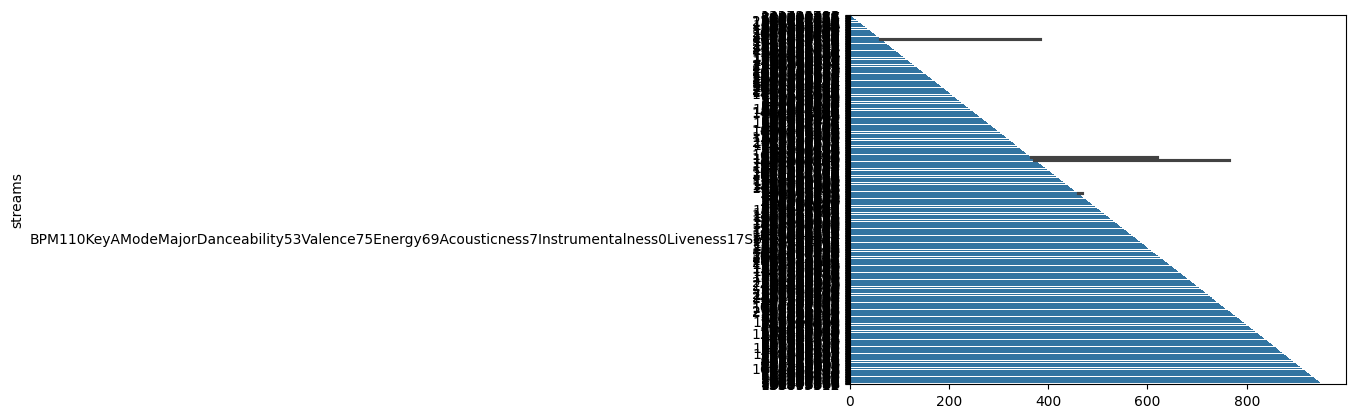

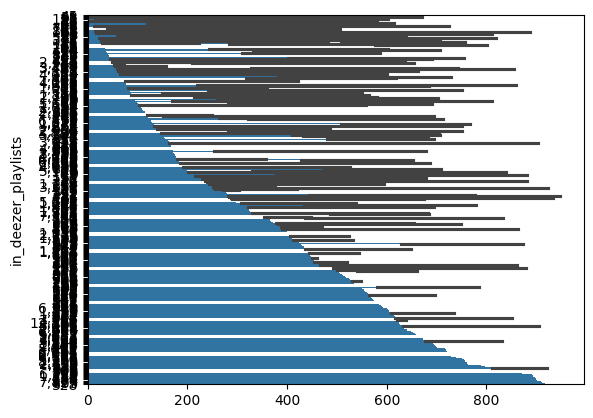

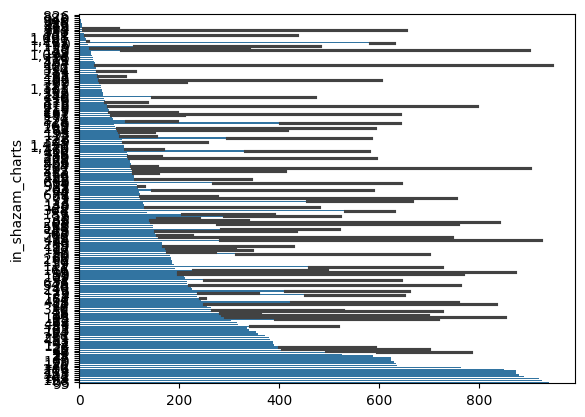

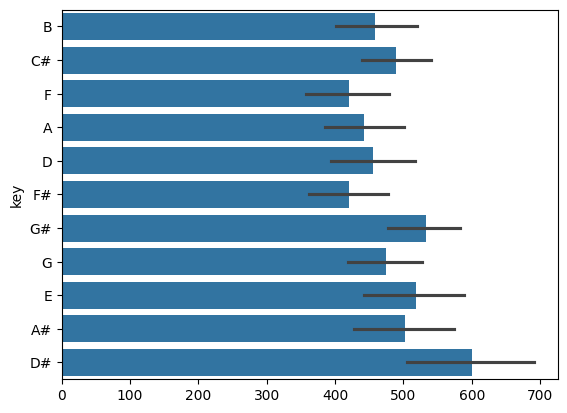

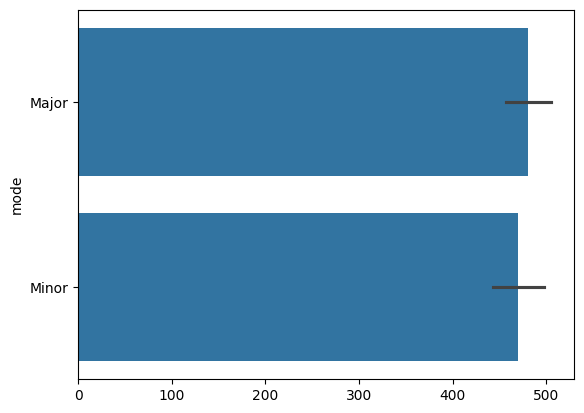

In [18]:
for c in cat_cols:
  sns.barplot(data[c])
  plt.show()

In [19]:
data.released_year.value_counts()#how many times each unique year appears; creating a new series:
                                                                             #another panda data structure.


released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

In [20]:
data.released_year.value_counts() / len(data) #mean; correlation; mean to zero; normalization;generic scale: 1 to -1


released_year
2022    0.421826
2023    0.183631
2021    0.124869
2020    0.038825
2019    0.037775
2017    0.024134
2016    0.018888
2014    0.013641
2013    0.013641
2015    0.011542
2018    0.010493
2012    0.010493
2011    0.010493
2010    0.007345
2002    0.006296
1999    0.005247
1984    0.004197
2000    0.004197
2004    0.004197
1963    0.003148
1958    0.003148
1995    0.002099
1970    0.002099
1959    0.002099
1985    0.002099
1957    0.002099
1986    0.002099
2003    0.002099
1991    0.002099
2008    0.002099
1975    0.002099
1982    0.002099
1946    0.001049
2005    0.001049
1942    0.001049
1996    0.001049
1998    0.001049
1950    0.001049
1979    0.001049
2007    0.001049
1952    0.001049
1971    0.001049
1994    0.001049
1930    0.001049
1973    0.001049
1997    0.001049
1968    0.001049
1992    0.001049
1983    0.001049
1987    0.001049
Name: count, dtype: float64

<Axes: xlabel='released_year', ylabel='count'>

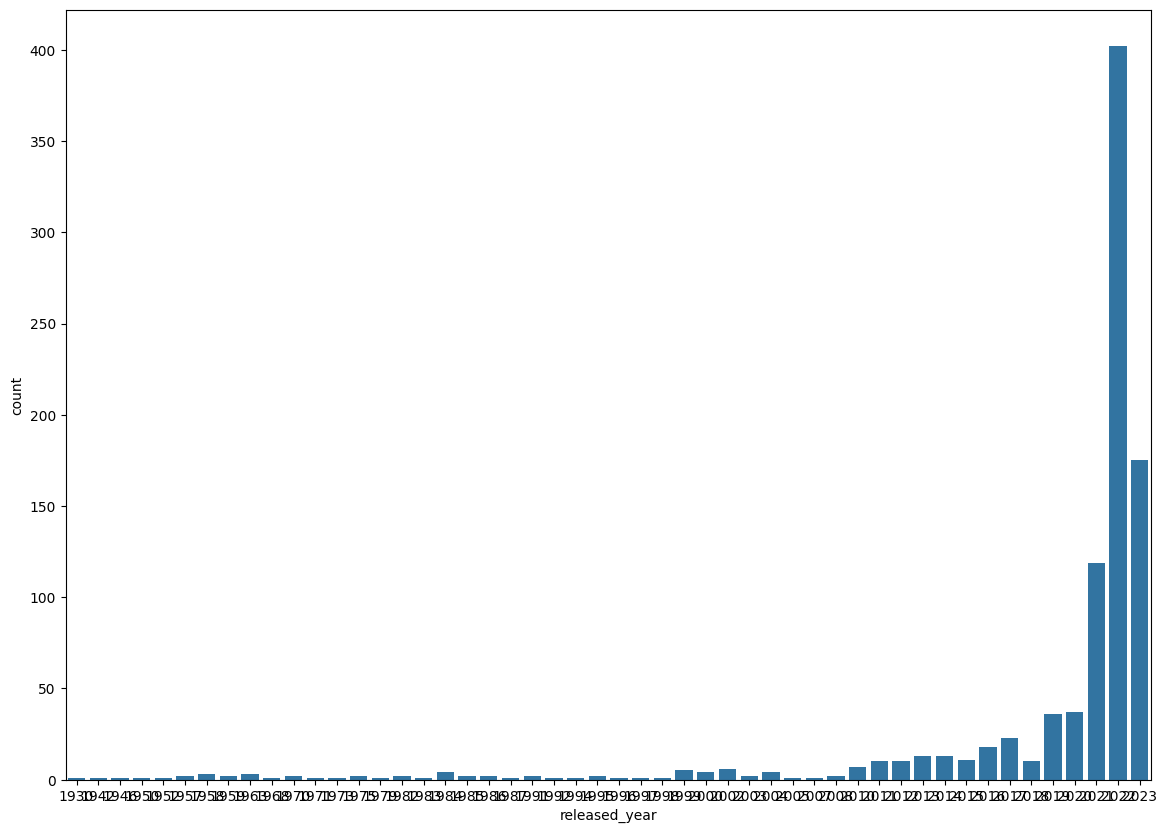

In [21]:
plt.figure(figsize=(14,10))
sns.barplot(data['released_year'].value_counts())


##Podemos apreciar desbalanceo en 2022 y 2023

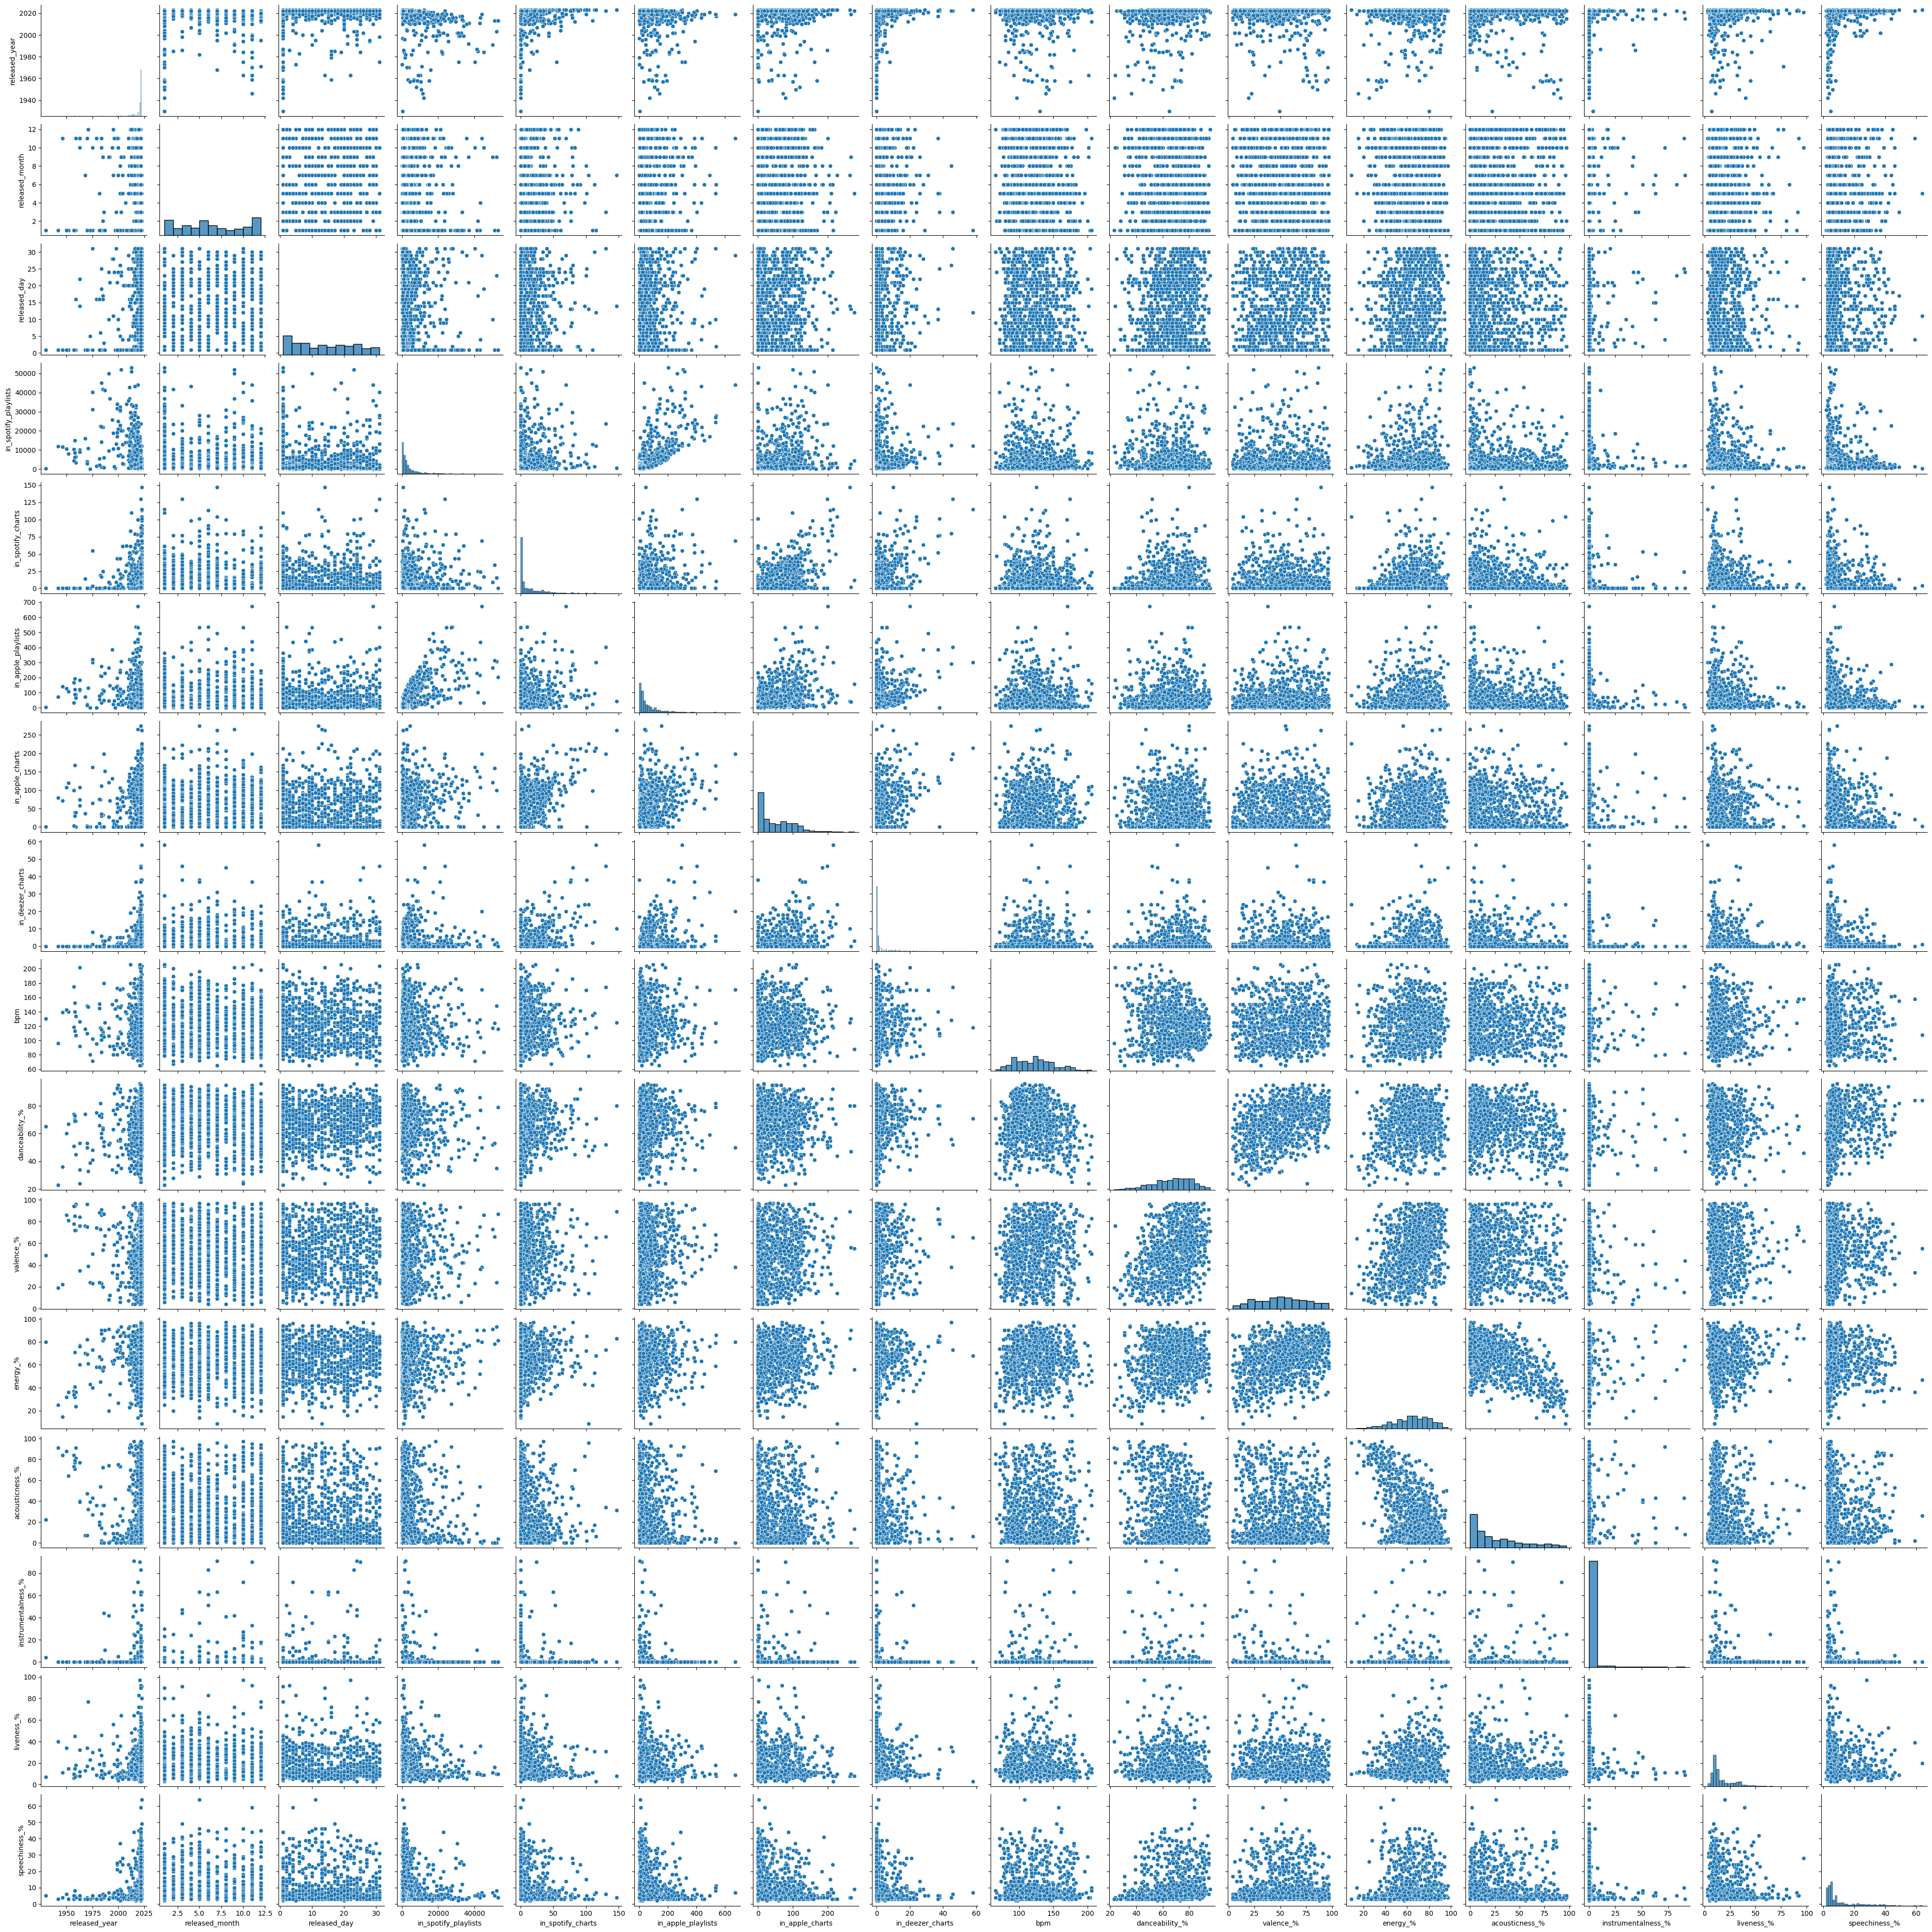

In [22]:
##corrigiendo desbalanceo:
sns.pairplot(data)

#Análisis de datos(notas)

##Standar deviation: Transforms data so that it´s mean is 0; and standard deviation of 1
##Use it when data follows a Gaussian distribution.
##Normalization(Min mAX SCALING):
##features in at specific range.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
data = {
    "Edad": [25, 30, 35, 40, 45, 78],
    "Ingreso mensual (miles)": [35, 50, 70, 90, 120, 600]
}

df = pd.DataFrame(data)
df

Edad  Ingreso mensual (miles)
0    25                       35
1    30                       50
2    35                       70
3    40                       90
4    45                      120
5    78                      600

In [25]:
# Calcular el promedio de la columna "Edades"
promedio_edades = df['Edad'].mean() #Selecting edad key and applying
                                    #The mean() method.

max_edades = df["Edad"].max()
print("Promedio de Edades:", promedio_edades)
max_edades

Promedio de Edades: 42.166666666666664


78

Text(0, 0.5, 'Ingreso mensual (en miles)')

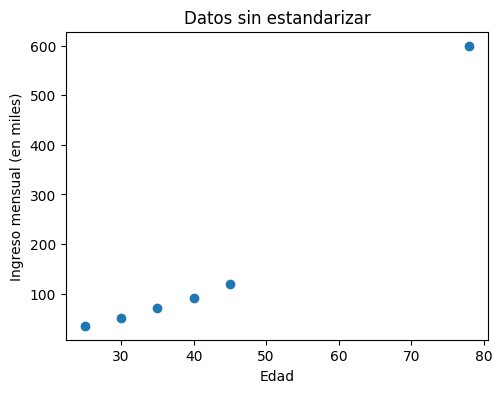

In [26]:
# Graficar los datos antes de la estandarización
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
# Corrected column name: 'Ingreso mensual (miles)'
            #y f(x)      x
plt.scatter(df['Edad'] , df['Ingreso mensual (miles)'])
plt.title('Datos sin estandarizar')
plt.xlabel('Edad')
plt.ylabel('Ingreso mensual (en miles)')

In [27]:
#Estandarizar las características numéricas.
scaler = StandardScaler()
# Change the column name to match the actual column name in your DataFrame
df[['Edad', 'Ingreso mensual (miles)']] = scaler.fit_transform(df[['Edad', 'Ingreso mensual (miles)']])
# Consejo: Las columnas que pongamos del lado izquierdo deben ser las mismas a las del lado derecho
df

Edad  Ingreso mensual (miles)
0 -0.993651                -0.634583
1 -0.704238                -0.558937
2 -0.414825                -0.458076
3 -0.125412                -0.357215
4  0.164001                -0.205924
5  2.074127                 2.214735

In [28]:
#Estandarizando:
scaler = StandardScaler()
# Correcting the column name to "Ingreso mensual (miles)"
df[["Edad", "Ingreso mensual (miles)"]] = scaler.fit_transform(df[["Edad", "Ingreso mensual (miles)"]])
df

Edad  Ingreso mensual (miles)
0 -0.993651                -0.634583
1 -0.704238                -0.558937
2 -0.414825                -0.458076
3 -0.125412                -0.357215
4  0.164001                -0.205924
5  2.074127                 2.214735

#Grficando data despues de estandarización.

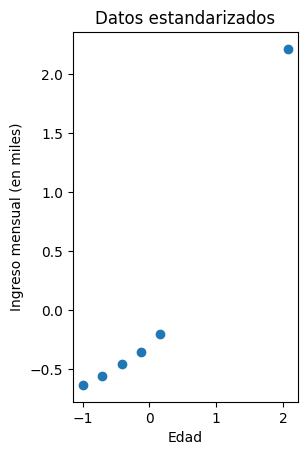

<Figure size 1200x800 with 0 Axes>

In [29]:
# Graficar los datos después de la estandarización
plt.subplot(1, 2, 2)
# Use the correct column name: 'Ingreso mensual (miles)'
plt.scatter(df['Edad'], df['Ingreso mensual (miles)'])
plt.title('Datos estandarizados')
plt.xlabel('Edad')
plt.ylabel('Ingreso mensual (en miles)')

plt.figure(figsize=(12,8))
plt.tight_layout()
plt.show()

##Escalando Min-MAX (Min-Max Scaling)

In [30]:
#Normalizar de [0,1]
from sklearn.preprocessing import MinMaxScaler

# Crear un DataFrame de ejemplo
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [0.1, 0.5, 0.8, 1.2, 1.5]
}

# Mostrar el DataFrame con datos sin escalar
df = pd.DataFrame(data)
df

Feature1  Feature2
0        10       0.1
1        20       0.5
2        30       0.8
3        40       1.2
4        50       1.5

In [31]:
# Escalar las características al rango [0, 1]
scaler = MinMaxScaler()
df[['Feature1', 'Feature2']] = scaler.fit_transform(df[['Feature1', 'Feature2']])

# Mostrar el DataFrame con datos escalados Min-Max
df

Feature1  Feature2
0      0.00  0.000000
1      0.25  0.285714
2      0.50  0.500000
3      0.75  0.785714
4      1.00  1.000000

##Encontrar varianza(qué tanto variían los datos; aportanto más info a nuestro modelo) y correlación(Qué variables utilizar y cuáles no), para así tener data training:

##Features de entrenamiento; outliers:
##1. released year
##2. In spotify playlist
##3. Instrumentalness
##4. Liveliness
###.5. Speachnees.

##No sé porqué no se detectan las train Features :(

In [36]:


# Transform data types: string
data["released_year"] = data["released_year"].astype(str)
data["in_spotify_playlists"] = data["in_spotify_playlists"].astype(str)
data["instrumentalness"] = data["instrumentalness"].astype(str)
data["liveness"] = data["liveness"].astype(str)
data["speechiness"] = data["speechiness"].astype(str)

# Assigning features
feature1 = data['released_year']
feature2 = data['in_spotify_playlists']
feature3 = data['instrumentalness']
feature4 = data['liveness']
feature5 = data['speechiness']

KeyError: 'released_year'

In [33]:
#Making our code agnostic, will run through CPU or GPU
# Setup device agnostic code: will run either on gpu or cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


##Normalizing Features; defining model


In [42]:


# Preprocessing  features and normalizing
data["instrumentalness"] = data["instrumentalness_%"].astype(float) / 100
data["liveness"] = data["liveness_%"].astype(float) / 100
data["speechiness"] = data["speechiness_%"].astype(float) / 100

# Defining input features and target variables.
features = data[["released_year", "in_spotify_playlists", "instrumentalness", "liveness", "speechiness"]].values
target = data["streams"].astype(float).values  # Ensure target is numeric


# Converting to Pytorch tensors.
X = torch.tensor(features, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32).unsqueeze(1)  # Make y a 2D tensor

# Define the model
class SpotifyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Linear layer with 5 input features and 1 output feature
        self.linear_layer = nn.Linear(in_features=5, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Initialize the model
torch.manual_seed(42)
model_0 = SpotifyLinearRegression()

# Check the model's parameters
print("Model's initial state_dict:")
print(model_0.state_dict())


KeyError: 'instrumentalness_%'

##Training model_Trining loop

###Setting loss function and optimizer

In [38]:
loss_fn = nn.L1Loss()

# Use a proper optimizer like Adam or SGD
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01) # Replace model1 with model_0 and using Adam optimizer

NameError: name 'model_0' is not defined

In [39]:
#Training loop:

epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    model_0.train()

    #1. Forward pass; train data using forward():
    y_pred = model1(X_train)

    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    #3. Zero grad_ optimizer; goes to zeros for each epoch:
    optimizer.zero_grad()

    #4. Loss backwards
    loss.backward()

    #5. Progress optimizer :
    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model1(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



NameError: name 'model1' is not defined

##4. Making Predictions of our model:

##Visualizing...

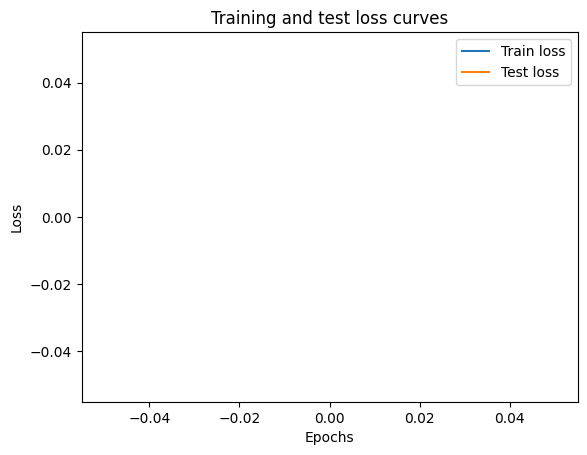

In [40]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
#plt.figure(figsize=(10,7))
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [41]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:


NameError: name 'model1' is not defined

In [ ]:
#Making predictions:
model1.eval()
with torch.inference_mode():
   y_preds = model1(X_test)

y_preds


In [ ]:
plot_predictions(predictions=y_preds)


##Saving the Model

In [ ]:
from pathlib import Path

#1. Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


#2 . cREATE MODEL SAVE PATH:
MODEL_NAME = "ExerciseonePredictingSpotify.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model1.state_dict(),
           f= MODEL_SAVE_PATH)
